In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Palmer Penguins dataset
url = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv'
penguins = pd.read_csv(url)

In [2]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [3]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [2]:
# Data Cleaning
penguins.dropna(inplace=True)

# Exploratory Data Analysis
(penguins.describe())

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [4]:
(penguins.describe(include='all')).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
species,344,3,Adelie,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
island,344,3,Biscoe,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bill_length_mm,342.0,NaN,NaN,NaN,43.92193,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,NaN,NaN,NaN,17.15117,1.974793,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,342.0,NaN,NaN,NaN,200.915205,14.061714,172.0,190.0,197.0,213.0,231.0
body_mass_g,342.0,NaN,NaN,NaN,4201.754386,801.954536,2700.0,3550.0,4050.0,4750.0,6300.0
sex,333,2,male,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,344.0,NaN,NaN,NaN,2008.02907,0.818356,2007.0,2007.0,2008.0,2009.0,2009.0


In [3]:
(penguins['species'].value_counts())

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [5]:
penguins.groupby('species').count()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
species,,,,,,,
Adelie,152,151,151,151,151,146,152
Chinstrap,68,68,68,68,68,68,68
Gentoo,124,123,123,123,123,119,124


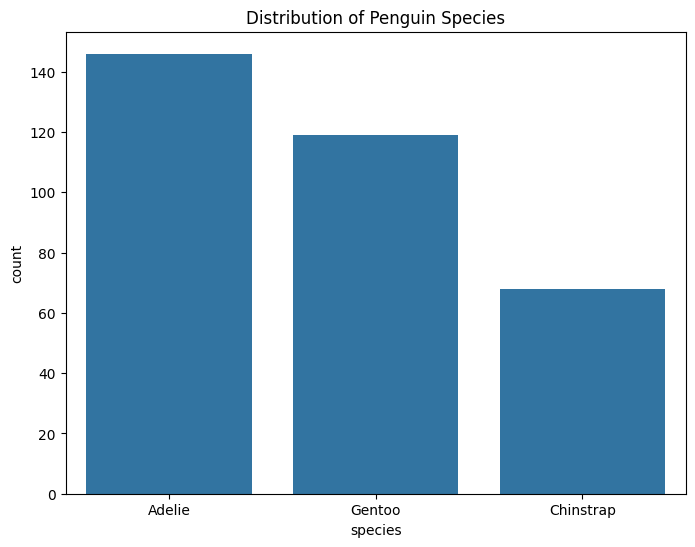

In [4]:
# Species Distribution Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(x='species', data=penguins)
plt.title('Distribution of Penguin Species')
plt.show()

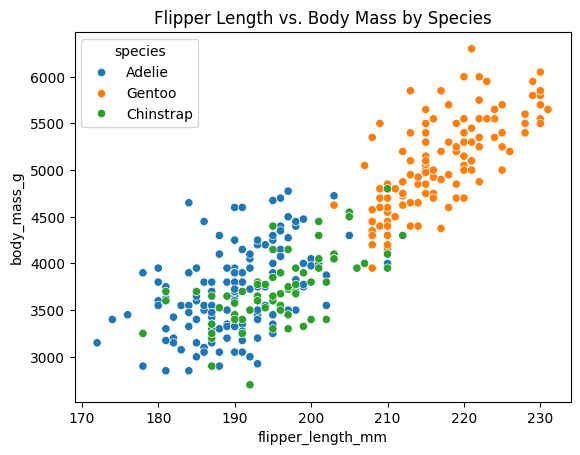

In [5]:
# Flipper Length vs. Body Mass Scatter Plot
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='species', data=penguins)
plt.title('Flipper Length vs. Body Mass by Species')
plt.show()

In [6]:
penguins['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

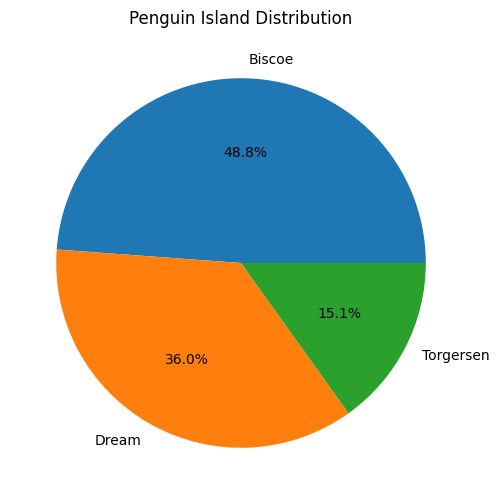

In [7]:
# Island Distribution Pie Chart
island_counts = penguins['island'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(island_counts, labels=island_counts.index, autopct='%1.1f%%')
plt.title('Penguin Island Distribution')
plt.show()

In [9]:
penguins.groupby(['species', 'sex']).count()['island'].to_frame().reset_index()

,species,sex,island
0,Adelie,female,73
1,Adelie,male,73
2,Chinstrap,female,34
3,Chinstrap,male,34
4,Gentoo,female,58
5,Gentoo,male,61


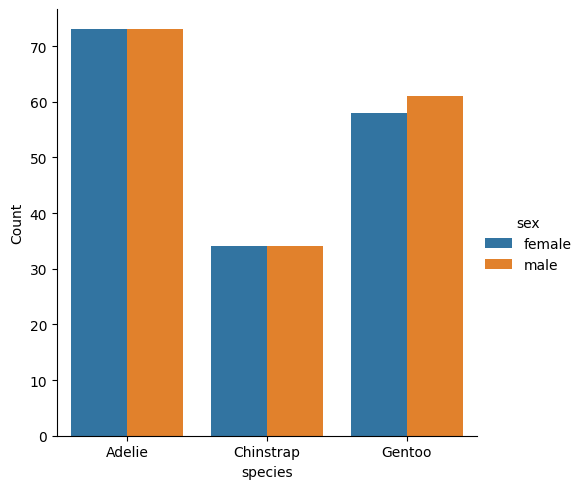

In [27]:
penguins_count = penguins.groupby(['species', 'sex']).count()['island'].to_frame().reset_index()
sns.catplot(
    data=penguins_count, kind="bar",
    x="species", y="island", hue="sex")
plt.ylabel('Count')
plt.show()

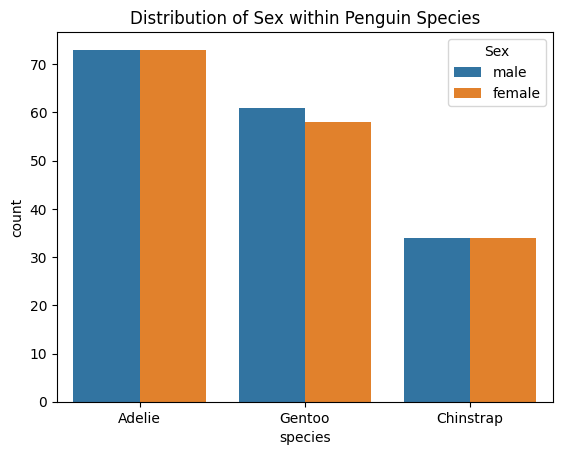

In [28]:
sns.countplot(x='species', hue='sex', data=penguins)
plt.title('Distribution of Sex within Penguin Species')
plt.legend(title='Sex')
plt.show()


In [31]:
correlations

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


In [32]:
correlations.melt(ignore_index=False).reset_index()

,index,variable,value
0,bill_length_mm,bill_length_mm,1.000000
1,bill_depth_mm,bill_length_mm,-0.228626
2,flipper_length_mm,bill_length_mm,0.653096
3,body_mass_g,bill_length_mm,0.589451
4,bill_length_mm,bill_depth_mm,-0.228626
5,bill_depth_mm,bill_depth_mm,1.000000
6,flipper_length_mm,bill_depth_mm,-0.577792
7,body_mass_g,bill_depth_mm,-0.472016
8,bill_length_mm,flipper_length_mm,0.653096
9,bill_depth_mm,flipper_length_mm,-0.577792


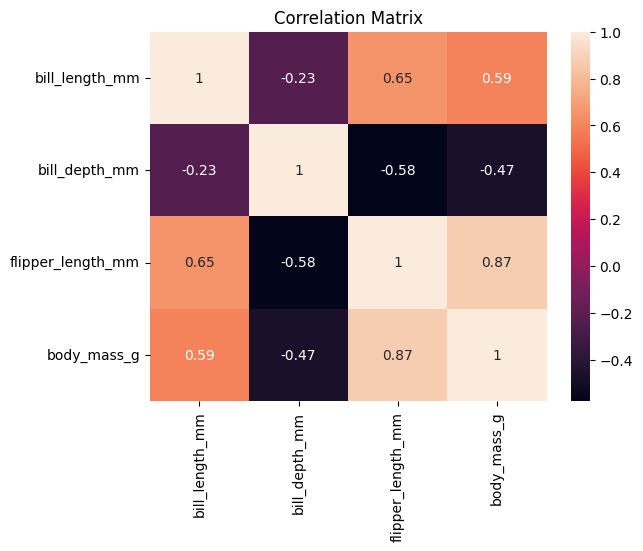

In [10]:
correlations = penguins.drop(columns=['species', 'island', 'sex', 'year']).corr()
sns.heatmap(correlations, annot=True)
plt.title('Correlation Matrix')
plt.show()

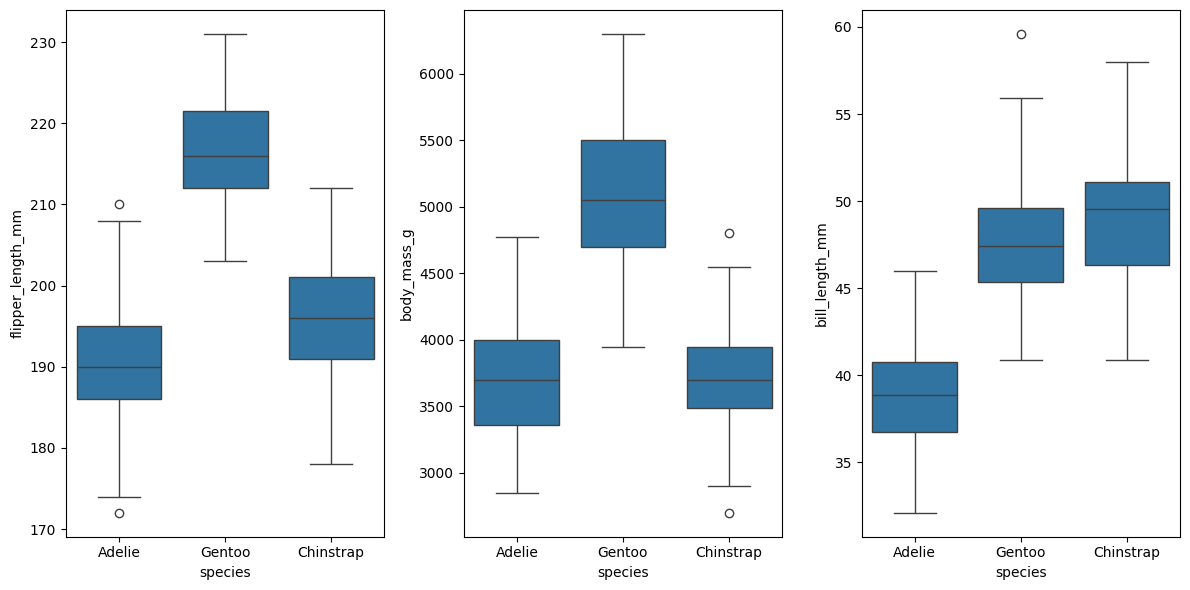

In [7]:
# Boxplots for Measurements
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='species', y='flipper_length_mm', data=penguins)
plt.subplot(1, 3, 2)
sns.boxplot(x='species', y='body_mass_g', data=penguins)
plt.subplot(1, 3, 3)
sns.boxplot(x='species', y='bill_length_mm', data=penguins)
plt.tight_layout()
plt.show()

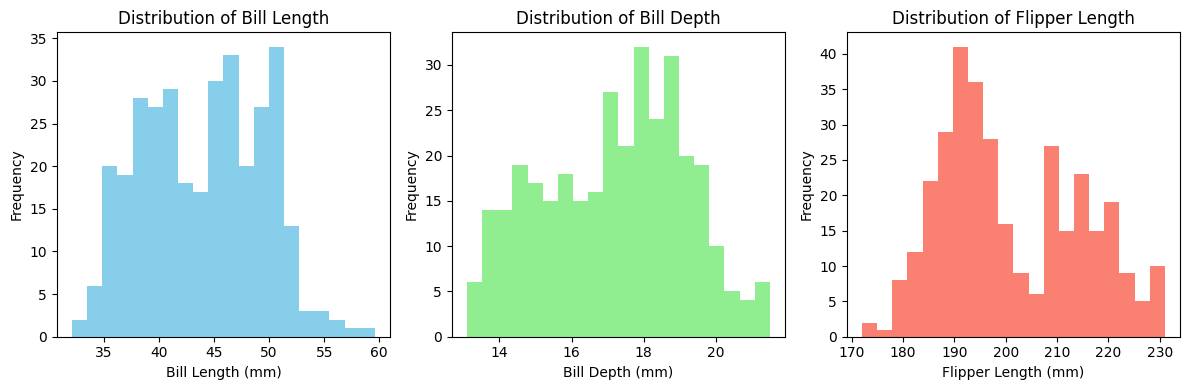

In [29]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(penguins['bill_length_mm'], bins=20, color='skyblue')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Bill Length')

plt.subplot(1, 3, 2)
plt.hist(penguins['bill_depth_mm'], bins=20, color='lightgreen')
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Bill Depth')

plt.subplot(1, 3, 3)
plt.hist(penguins['flipper_length_mm'], bins=20, color='salmon')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Flipper Length')

plt.tight_layout()
plt.show()


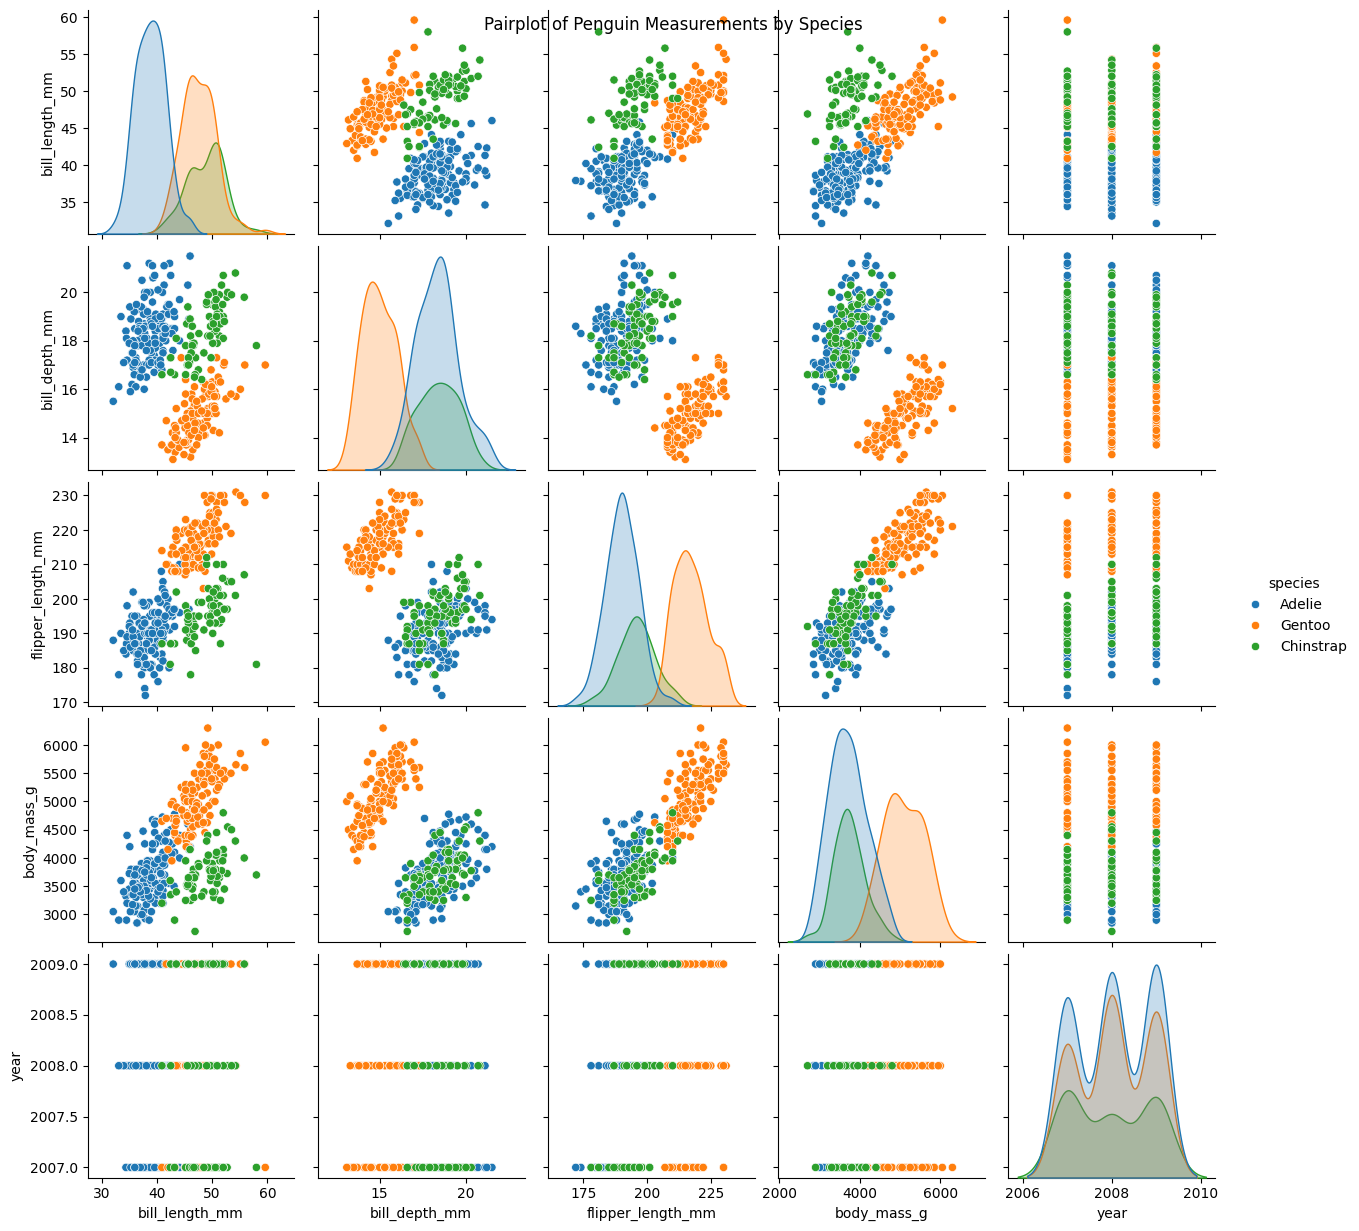

In [30]:
sns.pairplot(penguins, hue='species')
plt.suptitle('Pairplot of Penguin Measurements by Species')
plt.show()